In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import scipy.stats as stats
from time import time
import math

# Set the style
plt.style.use('science')

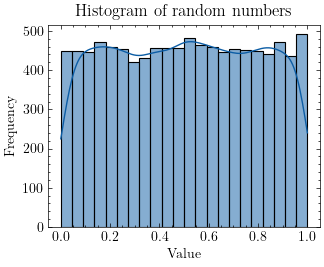

Statistical tests for uniformity:
----------------------------------
Kolmogorov-Smirnov test:
D = 0.006952908782774492
p-value = 0.7085521583778405



In [2]:
# Use the random number generator 𝒙𝒏 ≡ (𝒂𝒙𝒏−𝟏 + 𝒄) 𝒎𝒐𝒅(𝒎) with 𝒂 = 𝟕𝟓, 𝒄 = 𝟎 𝒂𝒏𝒅 𝒎 = 𝟐^𝟑𝟏 − 𝟏 to
# generate 10000 uniformly distributed random numbers on [𝟎, 𝟏] and plot the histogram. Do the numbers generated
# seem to be random? If so, how do you explain this? Perform 1 or 2 simple statistical tests to check if they are
# U[0,1].

# Parameters
a = 7**5
c = 0
m = 2**31 - 1
n = 10000

# Generate random numbers
x = np.zeros(n)
x[0] = 1
for i in range(1, n):
    x[i] = (a * x[i-1] + c) % m
    
# Normalize
x = x / m
 
# Plot histogram
plt.figure()
sns.histplot(x, kde=True)
plt.title('Histogram of random numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Perform statistical tests for uniformity
print('Statistical tests for uniformity:')
print('----------------------------------')

# Kolmogorov-Smirnov test
D = max(abs(np.sort(x) - np.linspace(0, 1, n)))
p_value = stats.kstest(x, 'uniform').pvalue
critical_value = 1.36 / math.sqrt(n)
print('Kolmogorov-Smirnov test:')
print('D =', D)
print('p-value =', p_value)
print('')

In [3]:
# Do the following by hand: Take 𝒂 = 𝟔 and 𝒎 = 𝟏𝟏 and 𝒙𝟎 = 𝟑 and generate
# 𝒙𝒏 ≡ (𝒂𝒙𝒏−𝟏 + 𝒄) 𝒎𝒐𝒅(𝒎) what sequence do you get? What is the period? Try now 𝒂 = 𝟔 and 𝒎 = 𝟏𝟎
# and 𝒙𝟎 = 𝟑 what sequence do you get? What is the period?

# Parameters
a = 6
m = 11
n = 10
x0 = 3

# Generate random numbers
x = np.zeros(n)
x[0] = x0
for i in range(1, n):
    x[i] = (a * x[i-1]) % m
    
# Print sequence
print('Sequence:')
print(x)
print('')

# Print period
print('Period:')
period = np.gcd(a, m)
print(period)
print('')

# Parameters
a = 6
m = 10
n = 10
x0 = 3

# Generate random numbers
x = np.zeros(n)
x[0] = x0
for i in range(1, n):
    x[i] = (a * x[i-1]) % m
    
# Print sequence
print('Sequence:')
print(x)
print('')

# Print period
print('Period:')
period = np.gcd(a, m)
print(period)
print('')

Sequence:
[ 3.  7.  9. 10.  5.  8.  4.  2.  1.  6.]

Period:
1

Sequence:
[3. 8. 8. 8. 8. 8. 8. 8. 8. 8.]

Period:
2



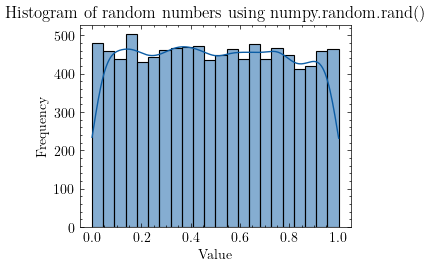

In [4]:
# Generate 10000 uniformly distributed random numbers on [𝟎, 𝟏] using the built-in function of MATLAB or
# another built in function in the computer language you are working.
 
# Generate random numbers
x = np.random.rand(10000)
# Compare the histograms obtained in parts a) and c) and comment on the results
plt.figure()
sns.histplot(x, kde=True)
plt.title('Histogram of random numbers using numpy.random.rand()')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

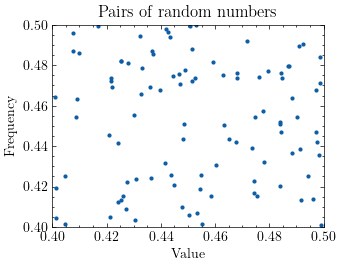

In [22]:
# Call the random numbers generated in part a) 𝑢1, 𝑢2, ⋯. Plot the pairs (𝑢1, 𝑢2), (𝑢2, 𝑢3),(𝑢3, 𝑢4), etc. Do
# you see any particular pattern? You might need to zoom on a much smaller subinterval of [0,1] to see a pattern.
 
# Plot pairs
# Parameters
a = 7**5
c = 0
m = 2**31 - 1
n = 10000

# Generate random numbers
x = np.zeros(n)
x[0] = 1
for i in range(1, n):
    x[i] = (a * x[i-1] + c) % m
    
# Normalize
x = x / m

plt.figure()
# zoom in
plt.xlim(0.4, 0.5)
plt.ylim(0.4, 0.5)
plt.plot(x[:-1], x[1:], 'o', markersize=2)
plt.title('Pairs of random numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

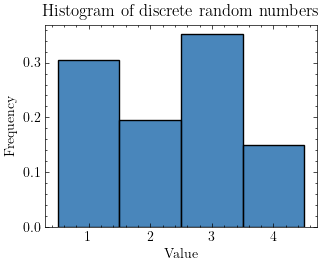

In [6]:
# 2)
# Use the numbers generated in problem 1, to generate 10000 discrete random numbers with the following
# probability distribution:
# 𝑃(𝑋 = 𝑘) = {
# 0.3 for 𝑘 = 1
# 0.2 for 𝑘 = 2
# 0.35 for 𝑘 = 3
# 0.15 for 𝑘 = 4
# b) Plot distribution obtained, and comment on the results.

# Generate random numbers
x = np.random.rand(10000)
y = np.zeros(10000)
y[x < 0.3] = 1
y[(x >= 0.3) & (x < 0.5)] = 2
y[(x >= 0.5) & (x < 0.85)] = 3
y[(x >= 0.85)] = 4

# Plot histogram
plt.figure()
sns.histplot(y, kde=False, discrete=True, stat='probability')
plt.title('Histogram of discrete random numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Time: 0.03699946403503418


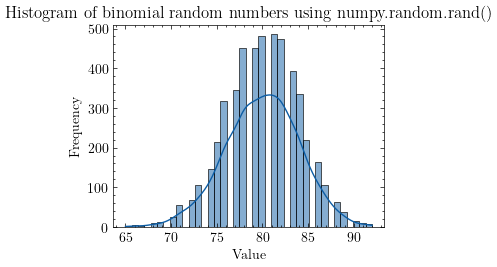

Probability: 0.00000000


In [7]:
# Generate 5000 Binomial distributed (𝑛 = 100, 𝑝 = 0.8) random numbers by doing:
# a) Generate Bernoulli random variables and add the results. Plot the histogram and use your data to calculate the
# probability that the Binomial random variable is less than or equal to 50. Compare with the theoretical answer.
# b) Use the inverse transformation method mentioned in class.
# c) Compare the histograms obtained in parts a) and b) and the computing times required in each method.

# a)
# Generate random numbers
n = 100
p = 0.8
x = np.zeros(5000)
start = time()
for i in range(5000):
    x[i] = np.sum(np.random.rand(n) < p)
end = time()

time_a = end - start
print('Time:', time_a)
    
# Plot histogram
plt.figure()
sns.histplot(x, kde=True)
plt.title('Histogram of binomial random numbers using numpy.random.rand()')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculate probability
prob = x[x <= 50].size / x.size
# using string formatting
print(f'Probability: {prob:.8f}')

Time: 0.03599953651428223


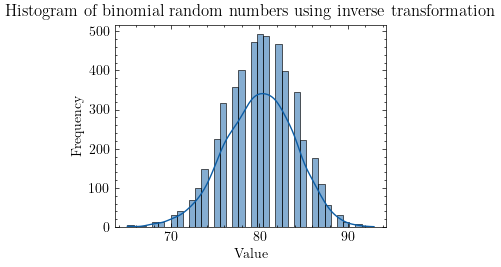

In [8]:
# b)
# Generate random numbers
n = 100
p = 0.8
x = np.zeros(5000)
start = time()
for i in range(5000):
    u = np.random.rand(n)
    x[i] = np.sum(u < p)
    
end = time()
print('Time:', end - start)
    
# Plot histogram
plt.figure()
sns.histplot(x, kde=True)
plt.title('Histogram of binomial random numbers using inverse transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


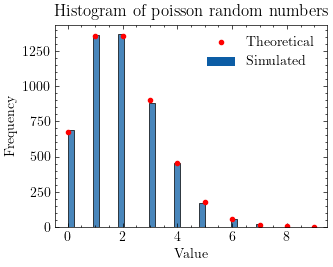

In [9]:
# # 4)
# Generate 5000 Poisson random variables with mean 𝜆 = 2. Plot the histogram of your results. Compare with the
# theoretical Poisson density
 
# Generate random numbers
lmbda = 2
x = np.random.poisson(lmbda, 5000)

# Plot histogram
plt.figure()
sns.histplot(x, kde=False)
# theoretical density
x = np.arange(0, 10)
y = stats.poisson.pmf(x, lmbda)
plt.plot(x, y * 5000, 'o', color='r', markersize=3)
plt.legend(['Theoretical', 'Simulated'])
plt.title('Histogram of poisson random numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

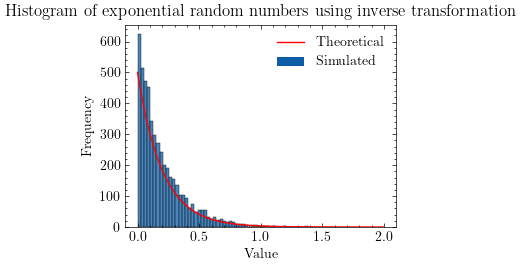

In [10]:
# 5)
# Generate 5000 Exponentially distributed with mean 𝜆 = 5 random numbers using the inverse transformation
# method mentioned in class. Plot the histogram of your results. Compare with the theoretical exponential density.

# Generate random numbers
lmbda = 5
x = -1 / lmbda * np.log(1 - np.random.rand(5000))

# Plot histogram
plt.figure()
sns.histplot(x, kde=False)
plt.title('Histogram of exponential random numbers using inverse transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
# theoretical density
x = np.linspace(0, 2, 100)
y = lmbda * np.exp(-lmbda * x)
plt.plot(x, y * 5000 * 2 / 100, color='r')
plt.legend(['Theoretical', 'Simulated'])
plt.show()


Text(0, 0.5, 'Frequency')

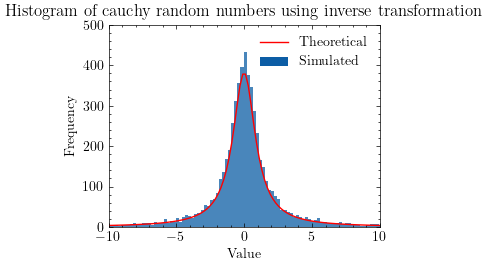

In [11]:
# # 6)
# Generate 6000 Cauchy distributed random numbers using the inverse transformation method mentioned in class.
# Plot the histogram of your results. Compare with the theoretical Cauchy density

# Generate random numbers
def cauchy_inverse(u):
    return np.tan(np.pi * (u - 0.5))

x = cauchy_inverse(np.random.rand(6000))

# Plot histogram
plt.figure()
sns.histplot(x, kde=False)
plt.xlim(-10, 10)
plt.ylim(0, 500)
# theoretical density
x = np.linspace(-10, 10, 100)
y = 1 / (np.pi * (1 + x**2))
plt.plot(x, y * 6000 * 20 / 100, color='r')
plt.legend(['Theoretical', 'Simulated'])
plt.title('Histogram of cauchy random numbers using inverse transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [12]:
# A deck of 100 cards (numbered 1, 2, . . . ,100) is shuffled and then turned over one card at a time. Say that a “hit”
# occurs whenever card i is the i th card to be turned over, i = 1, . . . ,100. Write a simulation program to estimate
# the expectation and variance of the total number of hits. Run the program. Find the exact answers and compare
# them with your estimates.

# Parameters
n = 100
n_sim = 10000
 
# Run simulation
hits = np.zeros(n_sim)
for i in range(n_sim):
    deck = np.arange(1, n+1)
    np.random.shuffle(deck)
    hits[i] = np.sum(deck == np.arange(1, n+1))
    
# Calculate expectation and variance
print('Expectation:', np.mean(hits))
print('Variance:', np.var(hits))

Expectation: 0.9906
Variance: 1.0125116399999998


In [13]:
# 7)
# A pair of fair dice are to be continually rolled until all the possible outcomes 2, 3, . . . , 12 have occurred at least
# once. Develop a simulation study to estimate the expected number of dice rolls that are needed.
 
# Parameters
dice = np.arange(1, 7)
n_sim = 10000

# Run simulation
rolls = np.zeros(n_sim)
for i in range(n_sim):
    n_rolls = 0
    outcomes = np.zeros(11)
    while np.sum(outcomes == 0) > 0:
        roll = np.random.choice(dice, 2)
        n_rolls += 1
        outcomes[np.sum(roll) - 2] = 1
    rolls[i] = n_rolls
    
# Calculate expectation
print('Expectation:', np.mean(rolls))
print('Variance:', np.var(rolls))


Expectation: 60.8642
Variance: 1251.52795836


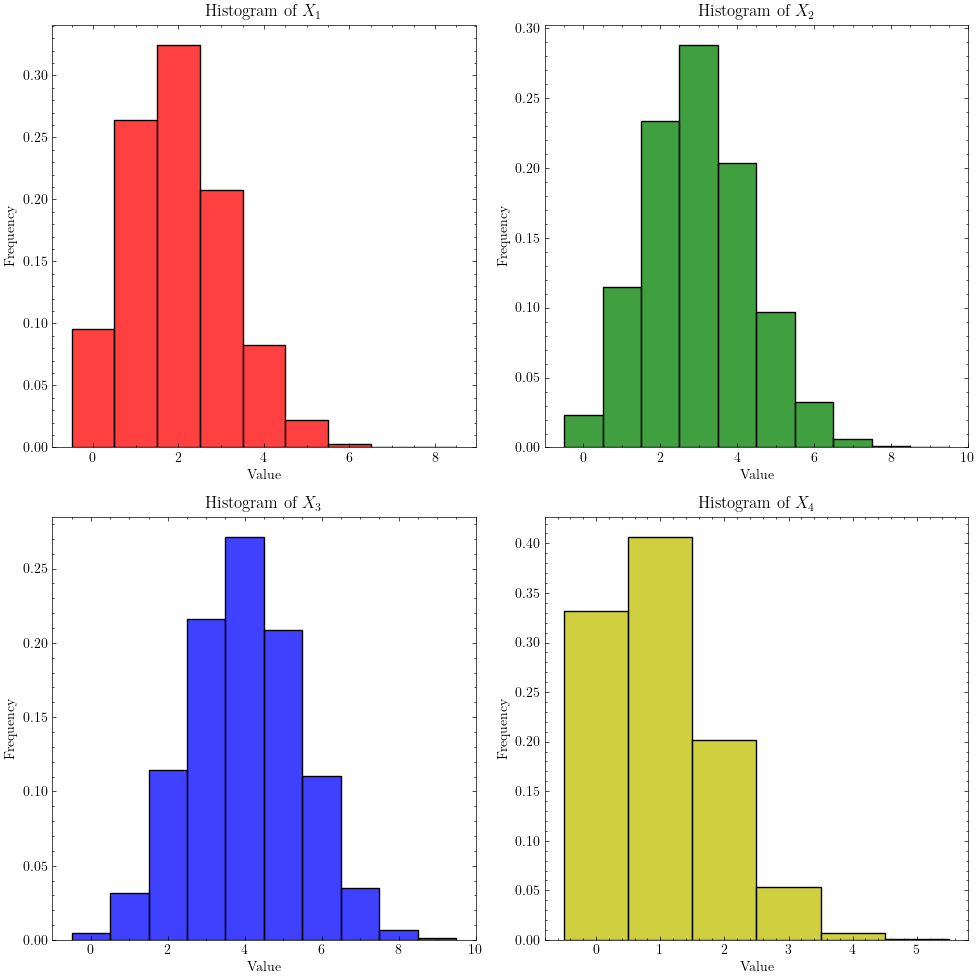

In [14]:
# 9)
# A random selection of 10 balls is to be made from an urn that contains 100 balls, 20 of which have color type 1,
# 30 of color type 2, 40 of color type 3 and 10 of type 4. Simulate 𝑋1, ⋯ , 𝑋4, where 𝑋𝑖 denotes the number of
# withdrawn balls that have color type i.

# Parameters
n_sim = 10000
n = 10

# Run simulation
x1 = np.zeros(n_sim)
x2 = np.zeros(n_sim)
x3 = np.zeros(n_sim)
x4 = np.zeros(n_sim)
for i in range(n_sim):
    urn = np.concatenate((np.zeros(20), np.ones(30), 2 * np.ones(40), 3 * np.ones(10)))
    np.random.shuffle(urn)
    x1[i] = np.sum(urn[:n] == 0)
    x2[i] = np.sum(urn[:n] == 1)
    x3[i] = np.sum(urn[:n] == 2)
    x4[i] = np.sum(urn[:n] == 3)
    
# Plot histograms

# subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# color type 1
sns.histplot(x1, kde=False, ax=axs[0, 0], discrete=True, stat='probability', color='r')
axs[0, 0].set_title('Histogram of $X_1$')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(x2, kde=False, ax=axs[0, 1], discrete=True, stat='probability', color='g')
axs[0, 1].set_title('Histogram of $X_2$')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(x3, kde=False, ax=axs[1, 0], discrete=True, stat='probability', color='b')
axs[1, 0].set_title('Histogram of $X_3$')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(x4, kde=False, ax=axs[1, 1], discrete=True, stat='probability', color='y')
axs[1, 1].set_title('Histogram of $X_4$')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:

# Generate 10000 independent samples from a standard normal distribution, by using:
# a) The Box-Muller method.
# b) The Marsaglia-Bray method.
# c) The acceptance-rejection method.
# d) An available built in function in your computer.
# e) Compare histograms and times required for the methods in a), b), c) and d) and the theoretical Gaussian density.

def box_muller_sample(n=10000):

    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
   
    r = np.sqrt(-2*np.log(u1))
    x = np.cos(2*np.pi*u2)
    y = np.sin(2*np.pi*u2)
    z1 = r*x
    z2 = r*y
   
    return z1, z2


def marsaglia_sample(n=1000):
    
    def marsaglia():
        
        while True:
            w1 = (np.random.rand() * 2) - 1
            w2 = (np.random.rand() * 2) - 1
            s = w1 * w1 + w2 * w2

            if s < 1:
                
                t = math.sqrt((-2) * math.log(s)/s)
                z1 = w1 * t
                z2 = w2 * t
                
                return z1, z2
   
    z1 = np.empty(n)
    z2 = np.empty(n)
   
    for i in range(n):
        z1[i], z2[i] = marsaglia()
       
    return z1, z2

# acceptance-rejection method
def acceptance_rejection_sample(n=10000):
    # Normal density
    def normal_density(x):
        return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
    
    # Proposal density
    def proposal_density(x):
        return np.exp(-x**2 / 2)
    
    z = np.empty(n)
    i = 0
    while i < n:
        u1 = np.random.rand()
        u2 = np.random.rand()
        x = np.random.randn()
        if u2 < normal_density(x) / (1.25 * proposal_density(x)):
            z[i] = x
            i += 1
    return z

# Generate random numbers
n = 10000
z1, z2 = box_muller_sample(n)
z3, z4 = marsaglia_sample(n)
z5 = acceptance_rejection_sample(n)
z6 = np.random.randn(n)

theoretical_density = stats.norm.pdf(np.linspace(-4, 4, 100), 0, 1)


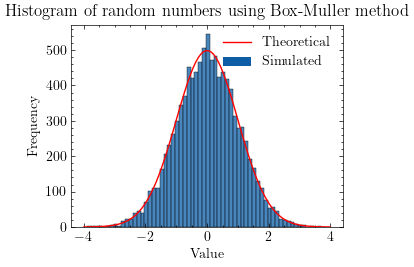

In [16]:
# plot histograms
plt.figure()
sns.histplot(z1, kde=False)
# theoretical density
plt.plot(np.linspace(-4, 4, 100), theoretical_density * n / 8, color='r')
plt.legend(['Theoretical', 'Simulated'])
plt.title('Histogram of random numbers using Box-Muller method')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

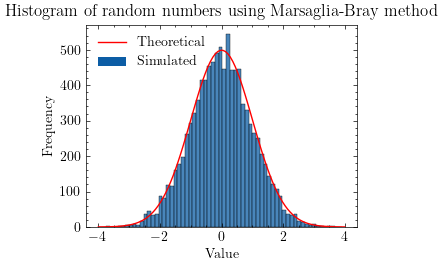

In [17]:
plt.figure()
sns.histplot(z3, kde=False)
# theoretical density
plt.plot(np.linspace(-4, 4, 100), theoretical_density * n / 8, color='r')
plt.legend(['Theoretical', 'Simulated'])
plt.title('Histogram of random numbers using Marsaglia-Bray method')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

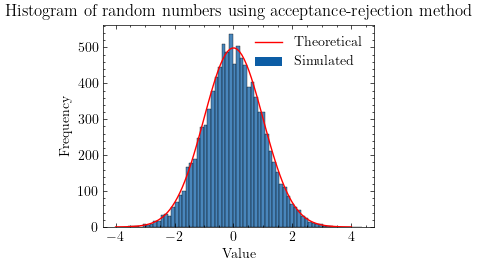

In [18]:
plt.figure()
sns.histplot(z5, kde=False)
# theoretical density
plt.plot(np.linspace(-4, 4, 100), theoretical_density * n / 8, color='r')
plt.legend(['Theoretical', 'Simulated'])
plt.title('Histogram of random numbers using acceptance-rejection method')
plt.xlabel('Value')
plt.ylabel('Frequency')

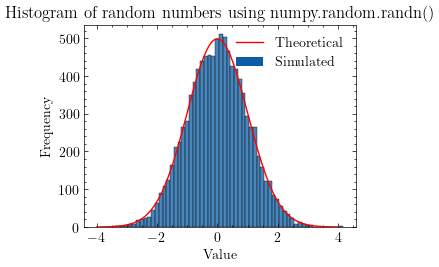

In [19]:
plt.figure()
sns.histplot(z6, kde=False)
# theoretical density
plt.plot(np.linspace(-4, 4, 100), theoretical_density * n  / 8, color='r')
plt.legend(['Theoretical', 'Simulated'])
plt.title('Histogram of random numbers using numpy.random.randn()')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()